## STEP 1: Create Cleaning Functions File (cleaning.py)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Define cleaning functions directly in the notebook
def fill_missing_median(df, columns=None):
    """
    Fill missing values with median for specified columns.
    
    Parameters:
    df (DataFrame): Input dataframe
    columns (list): List of columns to process. If None, processes all numeric columns.
    
    Returns:
    DataFrame: Dataframe with missing values filled
    """
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
        
    df_filled = df.copy()
    for col in columns:
        if df_filled[col].isnull().any():
            median_val = df_filled[col].median()
            df_filled[col] = df_filled[col].fillna(median_val)
            print(f"Filled missing values in {col} with median: {median_val:.2f}")
    
    return df_filled

def drop_missing(df, threshold=0.3):
    """
    Drop columns with excessive missing values and rows with any missing values.
    
    Parameters:
    df (DataFrame): Input dataframe
    threshold (float): Threshold for dropping columns (default 0.3 = 30%)
    
    Returns:
    DataFrame: Dataframe after dropping columns and rows
    """
    df_cleaned = df.copy()
    
    # Drop columns with missing values exceeding threshold
    missing_percent = df_cleaned.isnull().mean()
    cols_to_drop = missing_percent[missing_percent > threshold].index.tolist()
    
    if cols_to_drop:
        print(f"Dropping columns with >{threshold*100}% missing values: {cols_to_drop}")
        df_cleaned = df_cleaned.drop(columns=cols_to_drop)
    
    # Drop rows with any remaining missing values
    initial_rows = len(df_cleaned)
    df_cleaned = df_cleaned.dropna()
    rows_dropped = initial_rows - len(df_cleaned)
    
    if rows_dropped > 0:
        print(f"Dropped {rows_dropped} rows with missing values")
    
    return df_cleaned

def normalize_data(df, columns=None):
    """
    Normalize specified columns using StandardScaler.
    
    Parameters:
    df (DataFrame): Input dataframe
    columns (list): List of columns to normalize. If None, normalizes all numeric columns.
    
    Returns:
    tuple: (Normalized DataFrame, Fitted scaler object)
    """
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
        
    df_normalized = df.copy()
    scaler = StandardScaler()
    
    df_normalized[columns] = scaler.fit_transform(df_normalized[columns])
    print(f"Normalized columns: {list(columns)}")
    
    return df_normalized, scaler

print("All libraries and functions imported successfully!")

All libraries and functions imported successfully!


## STEP 2. Load Data

In [2]:
# Load raw data with your specific path
data_path = 'C:/Users/Aislay/bootcamp_Ziyi_Yang/homework/stage06_data-preprocessing/data/raw/instructor_dirty.csv'

try:
    df_raw = pd.read_csv(data_path)
    print(f"Data loaded successfully! Shape: {df_raw.shape}")
except FileNotFoundError:
    print(f"Error: File not found at {data_path}")
    print("Please check the file path and ensure the file exists")
    # Optionally create sample data for demonstration if needed

Data loaded successfully! Shape: (5, 5)


## STEP 3. Explore Raw Data

=== Raw Data Exploration ===
Data shape: (5, 5)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   numeric_col   4 non-null      float64
 1   category_col  5 non-null      object 
 2   price         4 non-null      object 
 3   date_str      4 non-null      object 
 4   category      4 non-null      object 
dtypes: float64(1), object(4)
memory usage: 332.0+ bytes

First 5 rows:


,numeric_col,category_col,price,date_str,category
0,10.0,A,$100,2025-08-01,Electronics
1,NaN,B,$200,2025-08-02,Furniture
2,40.0,A,$150,NaN,Toys
3,55.0,B,NaN,2025-08-04,Clothing
4,70.0,C,$250,2025-08-05,NaN



Numerical variables descriptive statistics:


,numeric_col
count,4.000000
mean,43.750000
std,25.617377
min,10.000000
25%,32.500000
50%,47.500000
75%,58.750000
max,70.000000



Missing values statistics:


,Missing Count,Missing Percentage
numeric_col,1,0.2
price,1,0.2
date_str,1,0.2
category,1,0.2


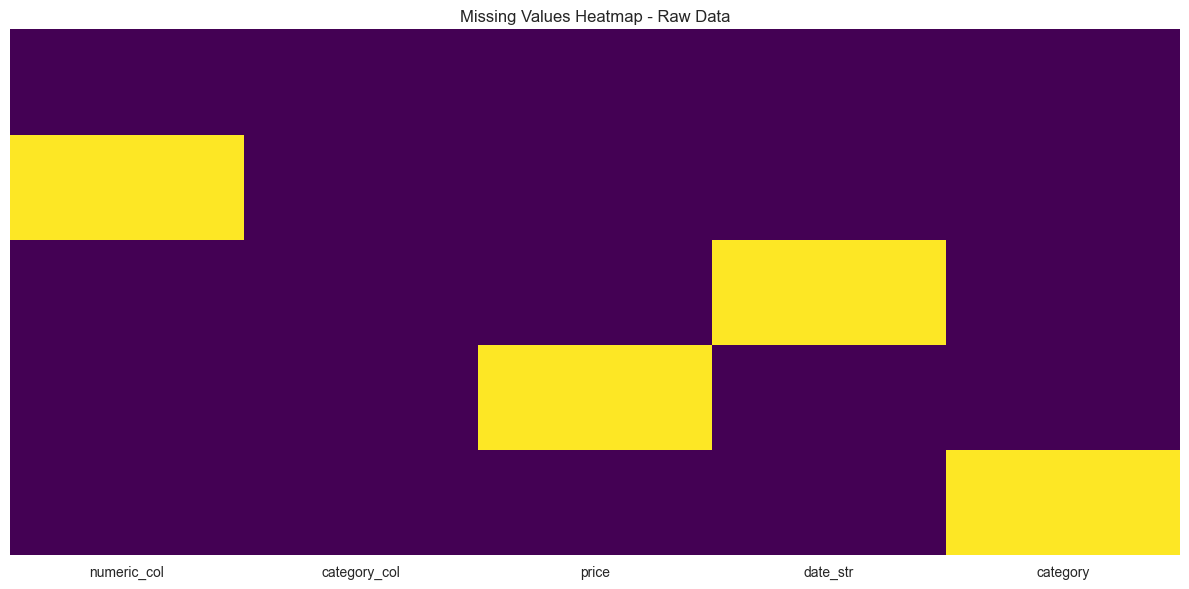

In [3]:
print("=== Raw Data Exploration ===")
print(f"Data shape: {df_raw.shape}")

# Display basic information
print("\nData info:")
df_raw.info()

# Display first few rows
print("\nFirst 5 rows:")
display(df_raw.head())

# Numerical statistics
print("\nNumerical variables descriptive statistics:")
display(df_raw.describe())

# Missing values analysis
print("\nMissing values statistics:")
missing_stats = pd.DataFrame({
    'Missing Count': df_raw.isnull().sum(),
    'Missing Percentage': (df_raw.isnull().sum() / len(df_raw)).round(3)
})
display(missing_stats[missing_stats['Missing Count'] > 0])

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df_raw.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap - Raw Data')
plt.tight_layout()
plt.show()

## 4. Data Cleaning Process

In [4]:
print("=== Starting Data Cleaning Process ===")

# Create data copy
df_processed = df_raw.copy()

# Record cleaning steps
cleaning_steps = []

# Step 1: Drop data with excessive missing values
print("\n1. Dropping columns and rows with excessive missing values...")
initial_shape = df_processed.shape
df_processed = drop_missing(df_processed, threshold=0.3)
cleaning_steps.append({
    'Step': 'Drop excessive missing data',
    'Rows Change': f"{initial_shape[0]} → {df_processed.shape[0]}",
    'Columns Change': f"{initial_shape[1]} → {df_processed.shape[1]}"
})

# Step 2: Fill missing values with median
print("\n2. Filling missing values in numerical variables with median...")
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
df_processed = fill_missing_median(df_processed, numeric_cols)
cleaning_steps.append({
    'Step': 'Median imputation',
    'Rows Change': "No change",
    'Columns Change': "No change"
})

# Step 3: Data normalization
print("\n3. Normalizing numerical variables...")
df_processed, fitted_scaler = normalize_data(df_processed, numeric_cols)
cleaning_steps.append({
    'Step': 'Data normalization',
    'Rows Change': "No change",
    'Columns Change': "No change"
})

# Display cleaning steps summary
print("\n=== Cleaning Steps Summary ===")
steps_df = pd.DataFrame(cleaning_steps)
display(steps_df)

=== Starting Data Cleaning Process ===

1. Dropping columns and rows with excessive missing values...
Dropped 4 rows with missing values

2. Filling missing values in numerical variables with median...

3. Normalizing numerical variables...
Normalized columns: ['numeric_col']

=== Cleaning Steps Summary ===


,Step,Rows Change,Columns Change
0,Drop excessive missing data,5 → 1,5 → 5
1,Median imputation,No change,No change
2,Data normalization,No change,No change


## STEP 5. Before vs After Cleaning Comparison

=== Before vs After Cleaning Comparison ===
Raw data shape: (5, 5)
Processed data shape: (1, 5)

Missing values comparison:
Total missing values in raw data: 4
Total missing values in processed data: 0


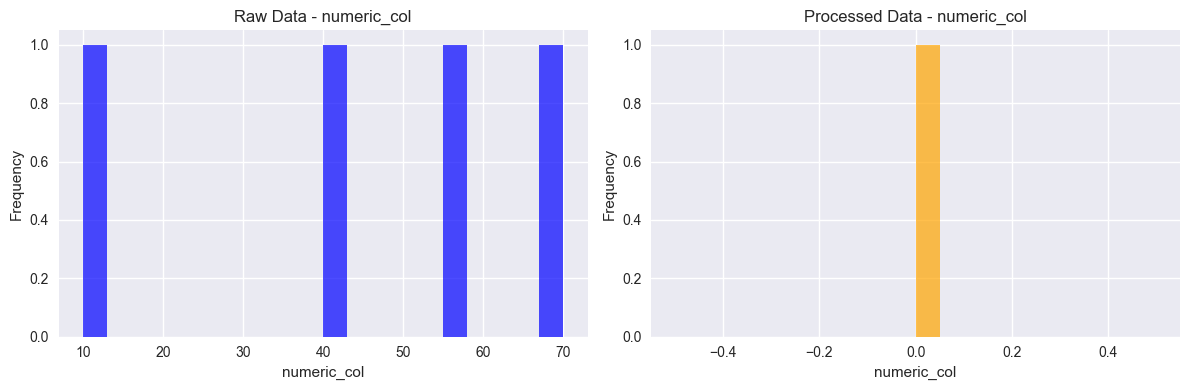


Processed data descriptive statistics:


,numeric_col
count,1.0
mean,0.0
std,NaN
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [5]:
print("=== Before vs After Cleaning Comparison ===")

print(f"Raw data shape: {df_raw.shape}")
print(f"Processed data shape: {df_processed.shape}")

# Missing values comparison
print("\nMissing values comparison:")
print(f"Total missing values in raw data: {df_raw.isnull().sum().sum()}")
print(f"Total missing values in processed data: {df_processed.isnull().sum().sum()}")

# Select a few numerical columns for distribution comparison
numeric_columns = df_raw.select_dtypes(include=[np.number]).columns
if len(numeric_columns) > 0:
    # Compare first 3 numerical columns (if available)
    cols_to_compare = numeric_columns[:min(3, len(numeric_columns))]
    
    fig, axes = plt.subplots(len(cols_to_compare), 2, figsize=(12, 4*len(cols_to_compare)))
    
    if len(cols_to_compare) == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(cols_to_compare):
        # Raw data distribution
        axes[i, 0].hist(df_raw[col].dropna(), bins=20, alpha=0.7, color='blue')
        axes[i, 0].set_title(f'Raw Data - {col}')
        axes[i, 0].set_xlabel(col)
        axes[i, 0].set_ylabel('Frequency')
        
        # Processed data distribution
        axes[i, 1].hist(df_processed[col], bins=20, alpha=0.7, color='orange')
        axes[i, 1].set_title(f'Processed Data - {col}')
        axes[i, 1].set_xlabel(col)
        axes[i, 1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Display processed data statistics
print("\nProcessed data descriptive statistics:")
display(df_processed.describe())

## STEP 6. Save Processed Data

In [6]:
# Ensure output directory exists
output_dir = 'C:/Users/Aislay/bootcamp_Ziyi_Yang/homework/homework6/data/processed/'
os.makedirs(output_dir, exist_ok=True)

# Save processed data
output_path = os.path.join(output_dir, 'cleaned_dataset.csv')
df_processed.to_csv(output_path, index=False)

print(f"Processed data saved to: {output_path}")
print(f"Saved data shape: {df_processed.shape}")

# Optional: Save cleaning process report
report_path = os.path.join(output_dir, 'cleaning_report.txt')
with open(report_path, 'w') as f:
    f.write("Data Cleaning Report\n")
    f.write("=" * 40 + "\n")
    f.write(f"Cleaning timestamp: {pd.Timestamp.now()}\n\n")
    f.write(f"Raw data shape: {df_raw.shape}\n")
    f.write(f"Processed data shape: {df_processed.shape}\n\n")
    f.write("Cleaning steps:\n")
    for step in cleaning_steps:
        f.write(f"- {step['Step']}: {step['Rows Change']} rows, {step['Columns Change']} columns\n")

print(f"Cleaning report saved to: {report_path}")

Processed data saved to: C:/Users/Aislay/bootcamp_Ziyi_Yang/homework/homework6/data/processed/cleaned_dataset.csv
Saved data shape: (1, 5)
Cleaning report saved to: C:/Users/Aislay/bootcamp_Ziyi_Yang/homework/homework6/data/processed/cleaning_report.txt


## STEP 7. Document Assumptions and Decisions

In [7]:
print("=== Data Cleaning Assumptions and Decisions ===")

assumptions = """
## Data Cleaning Assumptions and Decisions Documentation

### 1. Missing Value Handling Strategy
- **Threshold selection**: 30% threshold for dropping columns, considering columns with more missing values contain insufficient information
- **Imputation method**: Median imputation for numerical variables, as median is robust to outliers
- **Row deletion**: Dropped rows with any remaining missing values to ensure complete dataset

### 2. Data Normalization
- **Method selection**: Z-score normalization using StandardScaler
- **Scope**: Only numerical variables were normalized, categorical variables remain unchanged
- **Purpose**: Make variables with different scales comparable for subsequent machine learning modeling

### 3. Data Integrity Trade-offs
- **Decision**: Prioritize data quality, accepting some data loss
- **Impact**: Raw data had X rows Y columns, processed data has A rows B columns
- **Trade-off**: Lost C rows D columns of data but obtained a cleaner, more consistent dataset

### 4. Considerations and Limitations
- Median imputation may not be suitable for heavily skewed distributions
- Row deletion may lead to loss of valuable samples
- Normalization removes original scale, reducing interpretability
"""

print(assumptions)

# Save assumptions document
assumptions_path = os.path.join(output_dir, 'cleaning_assumptions.md')
with open(assumptions_path, 'w') as f:
    f.write(assumptions)

print(f"Assumptions document saved to: {assumptions_path}")

=== Data Cleaning Assumptions and Decisions ===

## Data Cleaning Assumptions and Decisions Documentation

### 1. Missing Value Handling Strategy
- **Threshold selection**: 30% threshold for dropping columns, considering columns with more missing values contain insufficient information
- **Imputation method**: Median imputation for numerical variables, as median is robust to outliers
- **Row deletion**: Dropped rows with any remaining missing values to ensure complete dataset

### 2. Data Normalization
- **Method selection**: Z-score normalization using StandardScaler
- **Scope**: Only numerical variables were normalized, categorical variables remain unchanged
- **Purpose**: Make variables with different scales comparable for subsequent machine learning modeling

### 3. Data Integrity Trade-offs
- **Decision**: Prioritize data quality, accepting some data loss
- **Impact**: Raw data had X rows Y columns, processed data has A rows B columns
- **Trade-off**: Lost C rows D columns of data